#                         # LINEAR REGRESSION

# FUNCTIONS

In [14]:
def miss_val(x):
    miss_val =[]
    for i in x.columns:
        for j in x[i]:
            if x[x[i].isna()].shape[0]>=1:
                miss_val.extend(x[x[i].isna()].index)
    return miss_val

            
            
def univariate_outlier(x):
    q1 = df[x].describe().T["25%"]
    q3 = df[x].describe().T["75%"]
    iqr = q3-q1
    inner = q1 -1.5*iqr
    outer = q3 +1.5*iqr
    out=[]
    for i,j in df[x].iteritems():
        if inner<j<outer:
            pass
        else:
            out.append(j)
    return out

def feature_box_kde_normality(x):
    normality_test(df[x])
    out=univariate_outlier(x)
    if len(out)==0:
        print(f"There is no outlier in {x}")
    else:
        print("Outlier :",out)
    f,(ax1,ax2) = plt.subplots(1,2,figsize=[15,3])
    sns.boxplot(data=df,x=x,ax=ax1)
    sns.kdeplot(data=df,x=x,ax=ax2)
    
def normality_test(x):
    s,p = shapiro(x)
    print(f"The statistic value is {s} with p-value : {p}")
    if p>0.05:
        print(f"{x.name} is normally distributed")
    else:
        print(f"{x.name} is not normally distributed")
        
def check_linearity(x,y):
    result = pd.DataFrame(columns=['F1','F2', 'r', 'p', 'significant'])
    for feature_name in x.columns:
            r,p = pearsonr(x[feature_name],y)
            if p >0.05:
                result = result.append({"F1":feature_name,"F2":y.name,"r":r,"p":p,"significant":"No"},ignore_index=True)
            else:
                result = result.append({"F1":feature_name,"F2":y.name,"r":r,"p":p,"significant":"yes"},ignore_index=True)
                plt.scatter(x[feature_name],y)
    return result



def check_multi_co_linearity(Xc):
    vif_values = [ VIF(Xc.values, i) for i in range(Xc.shape[1])]
    DF1= pd.DataFrame(vif_values, columns = ['VIF Value'], index = Xc.columns).sort_values('VIF Value', ascending = True)
    return DF1

In [15]:
def model_build(x,y):
    model=sm.OLS(y,x).fit()
    model.summary()
    return model.summary()

# AFTER MODEL BUILDING TESTS

In [16]:
from statsmodels.stats.stattools import durbin_watson
def auto_correlation(x):
    a = durbin_watson(residuals)
    return a

In [17]:
def  homoscedasticity_breuschpagan(residuals,xc):
    r,p = het_breuschpagan(residuals, xc)[2:]
    significance_level = 0.05
    if p > significance_level:
        print('We accept the null hypothesis : The errors are homoscedasticity')
    else:
        print('We accept the alter hypothesis : The errors are heteroscedasticity')
    return r,p 

In [18]:
def  homoscedasticity_goldfeldquandt(residuals,xc):
    r,p,flow = het_goldfeldquandt(residuals, xc)
    significance_level = 0.05
    if p > significance_level:
        print('We accept the null hypothesis : The errors are homoscedasticity')
    else:
        print('We accept the alter hypothesis : The errors are heteroscedasticity')
    return r,p,flow

In [19]:
def univariate_outlier_errors(x):
    q1 = x.describe().T["25%"]
    q3 = x.describe().T["75%"]
    iqr = q3-q1
    inner = q1 -1.5*iqr
    outer = q3 +1.5*iqr
    out=[]
    for i,j in x.iteritems():
        if inner<j<outer:
            pass
        else:
            out.append(j)
    return out


In [20]:
def feature_box_kde_normality_errors(x):
    normality_test(x)
    out=univariate_outlier_errors(x)
    if len(out)==0:
        print(f"There is no outlier in {x}")
    else:
        print("Outlier :",out)
    f,(ax1,ax2) = plt.subplots(1,2,figsize=[15,3])
    sns.boxplot(data=residuals,x=x,ax=ax1)
    sns.kdeplot(data=residuals,x=x,ax=ax2)
    

In [21]:
def jarque_bera(x):
    r,p,skew,kurtosis = jarque_bera(x)
    significance_level = 0.05
    if p > significance_level:
        print('We accept the null hypothesis : The errors are normal')
    else:
        print('We accept the alter hypothesis : The errors are not normal')
    return r,p,skew,kurtosis 

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from scipy.stats import shapiro , pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.api import het_goldfeldquandt
from statsmodels.stats.api import jarque_bera
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score

In [23]:

df = pd.read_csv("data.csv")

# our data is about Vehicle Performance Prediction


In [24]:
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


# GENERAL INFORMATION ABOUT DATASET

In [25]:
# shape of our dataset 

In [26]:
df.shape

(398, 9)

In [27]:
# it gives details about dataset with datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [28]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [29]:
# as origin is a categorical we convert into categorical from numerical
df.origin = df.origin.astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    object 
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [30]:
# there is special character in a column horserpower we have to remove that character
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

impute special character with mean values

In [31]:
df["horsepower"] = df["horsepower"].replace({"?":-1})
df["horsepower"] = df["horsepower"].astype("int")
df["horsepower"] = df["horsepower"].replace({-1:df["horsepower"].mean()})

# 1. NOW WE SEPARATE OUR DEPENDENT AND INDEPENDENT VARIABLES USING ILOC FUNCTION

In [32]:
# we mention independent variable as x
x = df.iloc[:,:-1]
x

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst
4,1,8,302.0,140.0,3449,10.5,1970,ford torino
...,...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982,ford mustang gl
394,2,4,97.0,52.0,2130,24.6,1982,vw pickup
395,1,4,135.0,84.0,2295,11.6,1982,dodge rampage
396,1,4,120.0,79.0,2625,18.6,1982,ford ranger


In [33]:
# we mention our dependent variable as y
y= df.iloc[:,-1]
y

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 398, dtype: float64

# 2.  we split our dataset in to two parts one for training and another for testing

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

In [114]:
x_train

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name
76,2,4,121.0,112.0,2933,14.5,1972,volvo 145e (sw)
367,1,4,112.0,88.0,2605,19.6,1982,chevrolet cavalier
331,3,4,97.0,67.0,2145,18.0,1980,subaru dl
394,2,4,97.0,52.0,2130,24.6,1982,vw pickup
71,3,3,70.0,97.0,2330,13.5,1972,mazda rx2 coupe
...,...,...,...,...,...,...,...,...
300,1,8,260.0,90.0,3420,22.2,1979,oldsmobile cutlass salon brougham
227,1,6,225.0,100.0,3630,17.7,1977,plymouth volare custom
74,1,8,302.0,140.0,4294,16.0,1972,ford gran torino (sw)
390,3,4,144.0,96.0,2665,13.9,1982,toyota celica gt


In [151]:
x= x_train

In [152]:
x

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name
76,2,4,121.0,112.0,2933,14.5,1972,volvo 145e (sw)
367,1,4,112.0,88.0,2605,19.6,1982,chevrolet cavalier
331,3,4,97.0,67.0,2145,18.0,1980,subaru dl
394,2,4,97.0,52.0,2130,24.6,1982,vw pickup
71,3,3,70.0,97.0,2330,13.5,1972,mazda rx2 coupe
...,...,...,...,...,...,...,...,...
300,1,8,260.0,90.0,3420,22.2,1979,oldsmobile cutlass salon brougham
227,1,6,225.0,100.0,3630,17.7,1977,plymouth volare custom
74,1,8,302.0,140.0,4294,16.0,1972,ford gran torino (sw)
390,3,4,144.0,96.0,2665,13.9,1982,toyota celica gt


In [153]:
y=y_train

In [154]:

y

76      7.652587
367    11.904024
331    14.369857
394    18.706323
71      8.077730
         ...    
300    10.160935
227     8.077730
74      5.526868
390    13.604599
100     7.652587
Name: Kilometer_per_liter, Length: 194, dtype: float64

# 3. TRAINING DATASET

# x_train and y_train are our training independent and dependent variables respectively.

# 4. Descritive Statistics
From our training dataset we split numerical and categorical columns as num and cat respectively

In [155]:
num = x_train.select_dtypes(exclude = 'object')
cat = x_train.select_dtypes(include= 'object')

# GENERAL INFORMATION ABOUT NUMERICAL COLUMNS

In [156]:
# out of 8 columns we got 5 colums as numerical as per assumptions 70 percent numerical columns is generalised
num.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 76 to 100
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     194 non-null    int64  
 1   displacement  194 non-null    float64
 2   horsepower    194 non-null    float64
 3   weight        194 non-null    int64  
 4   acceleration  194 non-null    float64
 5   year          194 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 10.6 KB


In [157]:
num

,cylinders,displacement,horsepower,weight,acceleration,year
76,4,121.0,112.0,2933,14.5,1972
367,4,112.0,88.0,2605,19.6,1982
331,4,97.0,67.0,2145,18.0,1980
394,4,97.0,52.0,2130,24.6,1982
71,3,70.0,97.0,2330,13.5,1972
...,...,...,...,...,...,...
300,8,260.0,90.0,3420,22.2,1979
227,6,225.0,100.0,3630,17.7,1977
74,8,302.0,140.0,4294,16.0,1972
390,4,144.0,96.0,2665,13.9,1982


In [158]:
# shape of numerical columns
num.shape

(194, 6)

# GENERAL INFORMATION ABOUT CATEGORICAL COLUMNS

In [159]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 76 to 100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   origin  194 non-null    object
 1   name    194 non-null    object
dtypes: object(2)
memory usage: 4.5+ KB


In [160]:
cat

,origin,name
76,2,volvo 145e (sw)
367,1,chevrolet cavalier
331,3,subaru dl
394,2,vw pickup
71,3,mazda rx2 coupe
...,...,...
300,1,oldsmobile cutlass salon brougham
227,1,plymouth volare custom
74,1,ford gran torino (sw)
390,3,toyota celica gt


In [161]:
# shape of categorical column
cat.shape

(194, 2)

# 5. Then we find the missing values and proportion

In [162]:
x

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name
76,2,4,121.0,112.0,2933,14.5,1972,volvo 145e (sw)
367,1,4,112.0,88.0,2605,19.6,1982,chevrolet cavalier
331,3,4,97.0,67.0,2145,18.0,1980,subaru dl
394,2,4,97.0,52.0,2130,24.6,1982,vw pickup
71,3,3,70.0,97.0,2330,13.5,1972,mazda rx2 coupe
...,...,...,...,...,...,...,...,...
300,1,8,260.0,90.0,3420,22.2,1979,oldsmobile cutlass salon brougham
227,1,6,225.0,100.0,3630,17.7,1977,plymouth volare custom
74,1,8,302.0,140.0,4294,16.0,1972,ford gran torino (sw)
390,3,4,144.0,96.0,2665,13.9,1982,toyota celica gt


In [163]:
# This gives the total missing values
x.isna().sum()

origin          0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
name            0
dtype: int64

In [164]:
# this gives proportion of nan values
x.isna().sum()/x.shape[0]*100  

origin          0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
year            0.0
name            0.0
dtype: float64

there is no missing values if there is a missing values we impute missing values by using mean , median, mode.

In [165]:
Miss_val=miss_val(x)

In [166]:
miss_records = list(set(Miss_val))

In [167]:
x.iloc[miss_records,:]

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name


# 6. Analysis 

# univariate ananlysis
   --------------------------------

# origin

# Descriptive Statistics

In [168]:
x['origin'].describe()

count     194
unique      3
top         1
freq      119
Name: origin, dtype: int64

# cylinders

# Descriptive statistics

In [169]:
x['cylinders'].describe()

count    194.000000
mean       5.515464
std        1.737209
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

The statistic value is 0.7487296462059021 with p-value : 3.831595629841154e-24
cylinders is not normally distributed
There is no outlier in cylinders


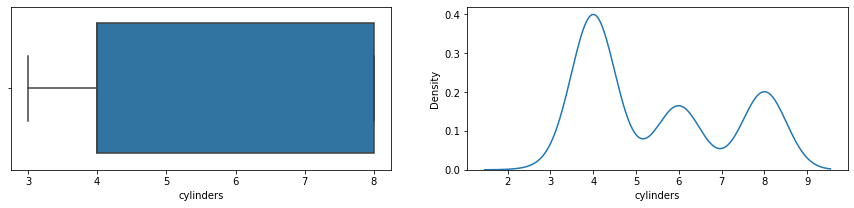

In [170]:
feature_box_kde_normality("cylinders")

# displacement

# Descriptive Statistics

In [171]:
x['displacement'].describe()

count    194.000000
mean     196.768041
std      106.853504
min       68.000000
25%      102.000000
50%      151.000000
75%      302.000000
max      455.000000
Name: displacement, dtype: float64

The statistic value is 0.8804193139076233 with p-value : 5.1434173206608516e-17
displacement is not normally distributed
There is no outlier in displacement


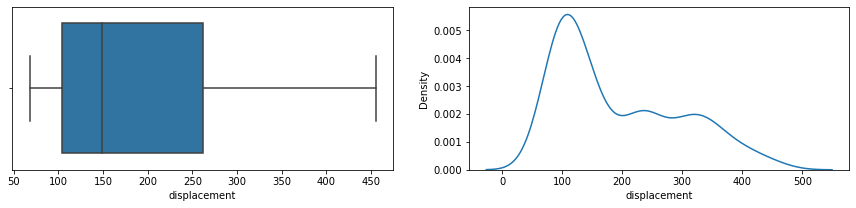

In [172]:
feature_box_kde_normality("displacement")

# horsepower

# Descriptive Statistics

In [173]:
x['horsepower'].describe()

count    194.000000
mean     106.231337
std       39.269057
min       48.000000
25%       77.250000
50%       95.000000
75%      131.500000
max      225.000000
Name: horsepower, dtype: float64

The statistic value is 0.9047379493713379 with p-value : 4.22780613754223e-15
horsepower is not normally distributed
Outlier : [220.0, 215.0, 225.0, 225.0, 215.0, 200.0, 210.0, 208.0, 215.0, 225.0, 230.0]


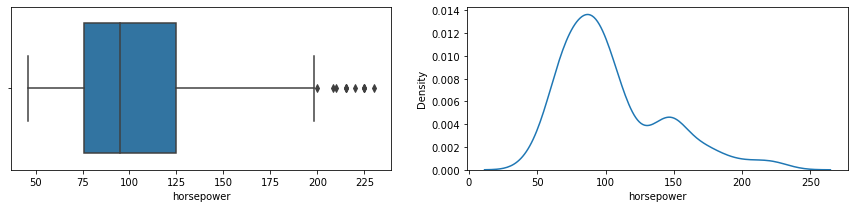

In [174]:
feature_box_kde_normality("horsepower")

# weight

# Descriptive Statistics

In [175]:
x['weight'].describe()

count     194.000000
mean     3010.850515
std       871.146807
min      1649.000000
25%      2227.000000
50%      2868.000000
75%      3627.500000
max      5140.000000
Name: weight, dtype: float64

The statistic value is 0.9413594603538513 with p-value : 1.9702153103429154e-11
weight is not normally distributed
There is no outlier in weight


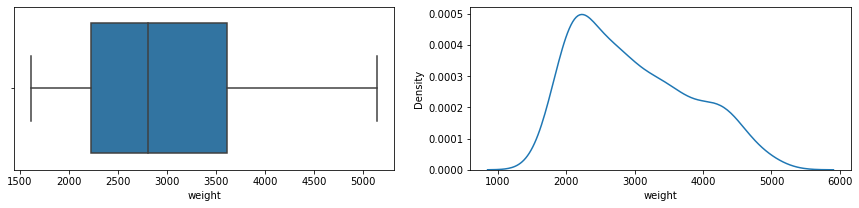

In [176]:
feature_box_kde_normality("weight")

# acceleration

# Descriptive Statistics

In [177]:
x['acceleration'].describe()

count    194.000000
mean      15.537629
std        2.783068
min        8.500000
25%       13.650000
50%       15.350000
75%       17.000000
max       24.600000
Name: acceleration, dtype: float64

The statistic value is 0.9923787713050842 with p-value : 0.039872437715530396
acceleration is not normally distributed
Outlier : [8.5, 8.5, 8.0, 23.5, 22.2, 24.8, 22.2, 23.7, 24.6]


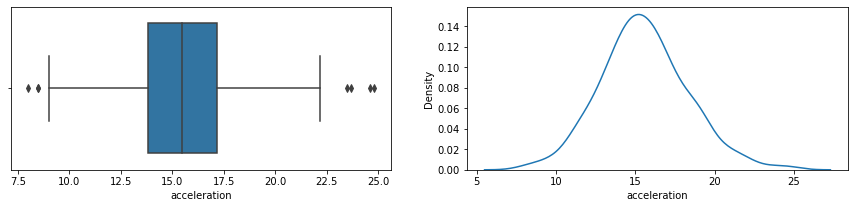

In [178]:
feature_box_kde_normality("acceleration")

# year

# Descriptive Statistics

In [179]:
x['year'].describe()

count     194.000000
mean     1976.036082
std         3.675114
min      1970.000000
25%      1973.000000
50%      1976.000000
75%      1979.000000
max      1982.000000
Name: year, dtype: float64

In [180]:
x['year'].unique()

array([1972, 1982, 1980, 1979, 1970, 1977, 1973, 1978, 1976, 1971, 1974,
       1981, 1975], dtype=int64)

The statistic value is 0.9458529353141785 with p-value : 6.965314436335746e-11
year is not normally distributed
There is no outlier in year


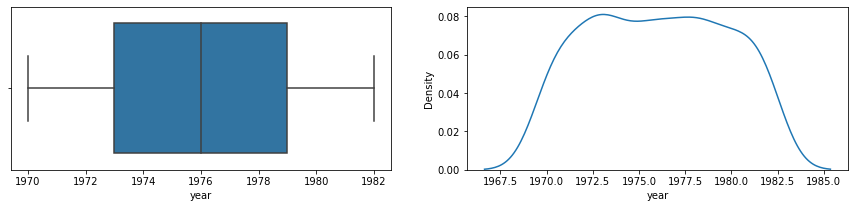

In [181]:
feature_box_kde_normality("year")

# name

# Descriptive Statistics

In [182]:
x['name'].describe()

count            194
unique           162
top       amc hornet
freq               4
Name: name, dtype: object

# Kilometer_per_liter

# Descriptive Statistics

The statistic value is 0.9679654240608215 with p-value : 1.183135580618e-07
Kilometer_per_liter is not normally distributed
Outlier : [19.81169676625068]


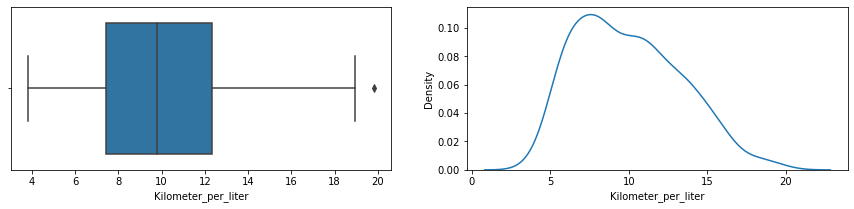

In [183]:
feature_box_kde_normality("Kilometer_per_liter")

# Bivariate analysis

# here we have to analyse each numerical column with dependent variables

In [184]:
num

,cylinders,displacement,horsepower,weight,acceleration,year
76,4,121.0,112.0,2933,14.5,1972
367,4,112.0,88.0,2605,19.6,1982
331,4,97.0,67.0,2145,18.0,1980
394,4,97.0,52.0,2130,24.6,1982
71,3,70.0,97.0,2330,13.5,1972
...,...,...,...,...,...,...
300,8,260.0,90.0,3420,22.2,1979
227,6,225.0,100.0,3630,17.7,1977
74,8,302.0,140.0,4294,16.0,1972
390,4,144.0,96.0,2665,13.9,1982


In [185]:
X= num

In [186]:
X

,cylinders,displacement,horsepower,weight,acceleration,year
76,4,121.0,112.0,2933,14.5,1972
367,4,112.0,88.0,2605,19.6,1982
331,4,97.0,67.0,2145,18.0,1980
394,4,97.0,52.0,2130,24.6,1982
71,3,70.0,97.0,2330,13.5,1972
...,...,...,...,...,...,...
300,8,260.0,90.0,3420,22.2,1979
227,6,225.0,100.0,3630,17.7,1977
74,8,302.0,140.0,4294,16.0,1972
390,4,144.0,96.0,2665,13.9,1982


In [187]:
y

76      7.652587
367    11.904024
331    14.369857
394    18.706323
71      8.077730
         ...    
300    10.160935
227     8.077730
74      5.526868
390    13.604599
100     7.652587
Name: Kilometer_per_liter, Length: 194, dtype: float64

,F1,F2,r,p,significant
0,cylinders,Kilometer_per_liter,-0.789125,0.0,yes
1,displacement,Kilometer_per_liter,-0.817632,0.0,yes
2,horsepower,Kilometer_per_liter,-0.793493,0.0,yes
3,weight,Kilometer_per_liter,-0.827055,0.0,yes
4,acceleration,Kilometer_per_liter,0.491448,0.0,yes
5,year,Kilometer_per_liter,0.629786,0.0,yes


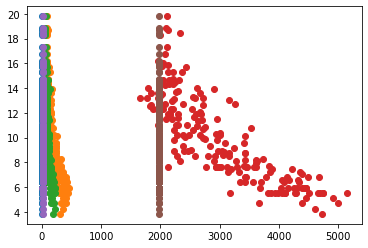

In [188]:
check_linearity(X,y)

# linearity test checked 

# Multivariate Analysis

In [189]:
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52.0,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84.0,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79.0,2625,18.6,1982,ford ranger,11.904024


<AxesSubplot:>

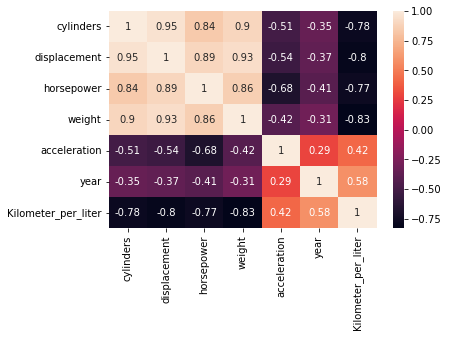

In [190]:
sns.heatmap(data=df.corr(),annot=True)

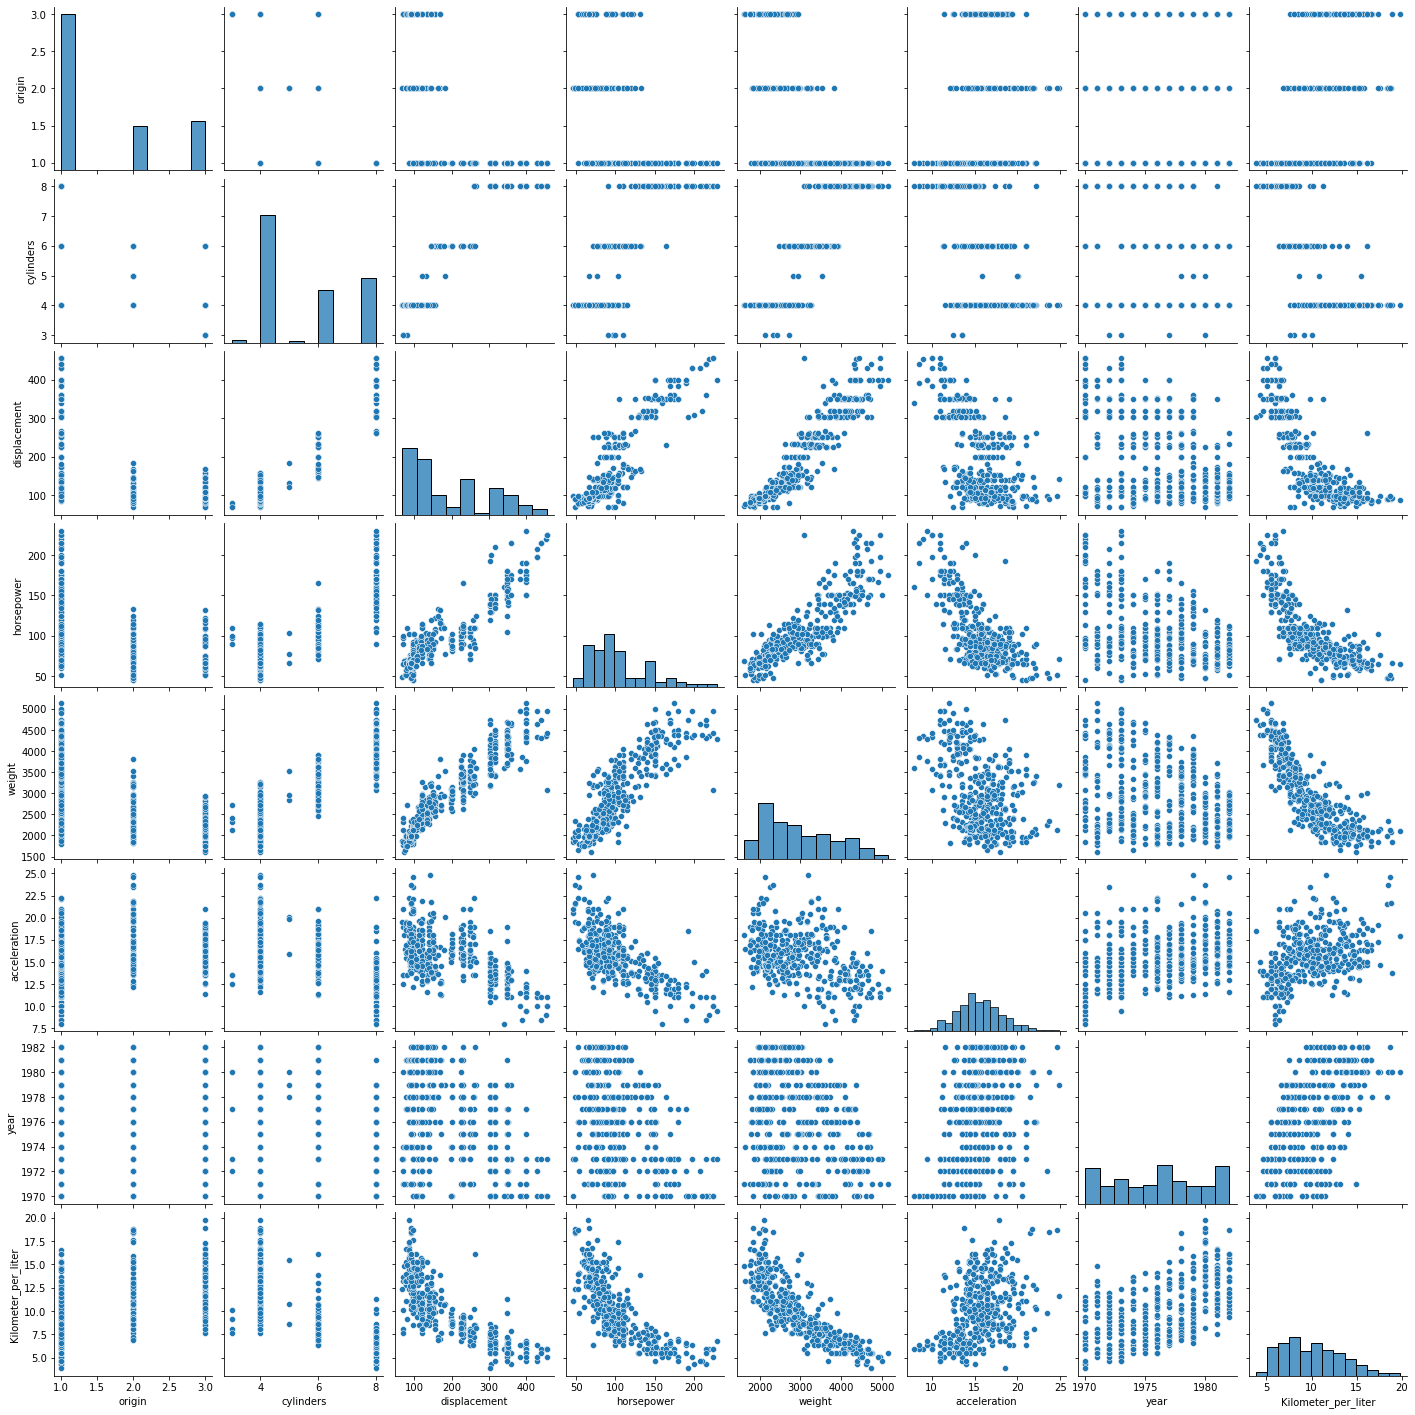

In [191]:
sns.pairplot(data=df)

In [192]:
df.groupby(['origin', 'cylinders'])['weight'].mean()

origin  cylinders
1       4            2437.166667
        6            3213.905405
        8            4114.718447
2       4            2330.015873
        5            3103.333333
        6            3382.500000
3       3            2398.500000
        4            2153.492754
        6            2882.000000
Name: weight, dtype: float64

# multicolinearity test

In [193]:
df.groupby(['origin', 'cylinders'])['weight'].mean()

origin  cylinders
1       4            2437.166667
        6            3213.905405
        8            4114.718447
2       4            2330.015873
        5            3103.333333
        6            3382.500000
3       3            2398.500000
        4            2153.492754
        6            2882.000000
Name: weight, dtype: float64

In [194]:
# We have to add constant to avoid raise VIF factor
Xc = sm.add_constant(X)
Xc


,const,cylinders,displacement,horsepower,weight,acceleration,year
76,1.0,4,121.0,112.0,2933,14.5,1972
367,1.0,4,112.0,88.0,2605,19.6,1982
331,1.0,4,97.0,67.0,2145,18.0,1980
394,1.0,4,97.0,52.0,2130,24.6,1982
71,1.0,3,70.0,97.0,2330,13.5,1972
...,...,...,...,...,...,...,...
300,1.0,8,260.0,90.0,3420,22.2,1979
227,1.0,6,225.0,100.0,3630,17.7,1977
74,1.0,8,302.0,140.0,4294,16.0,1972
390,1.0,4,144.0,96.0,2665,13.9,1982


In [197]:
Xc

,const,cylinders,displacement,horsepower,weight,acceleration,year
76,1.0,4,121.0,112.0,2933,14.5,1972
367,1.0,4,112.0,88.0,2605,19.6,1982
331,1.0,4,97.0,67.0,2145,18.0,1980
394,1.0,4,97.0,52.0,2130,24.6,1982
71,1.0,3,70.0,97.0,2330,13.5,1972
...,...,...,...,...,...,...,...
300,1.0,8,260.0,90.0,3420,22.2,1979
227,1.0,6,225.0,100.0,3630,17.7,1977
74,1.0,8,302.0,140.0,4294,16.0,1972
390,1.0,4,144.0,96.0,2665,13.9,1982


In [198]:
check_multi_co_linearity(Xc)

,VIF Value
year,1.328590
acceleration,2.710823
horsepower,10.389485
cylinders,10.981881
weight,12.604836
displacement,22.319065
const,388759.719431


In [199]:
xc= Xc.drop(['horsepower', 'cylinders','displacement','acceleration'],axis = 1)

In [201]:
xc

,const,weight,year
76,1.0,2933,1972
367,1.0,2605,1982
331,1.0,2145,1980
394,1.0,2130,1982
71,1.0,2330,1972
...,...,...,...
300,1.0,3420,1979
227,1.0,3630,1977
74,1.0,4294,1972
390,1.0,2665,1982


In [202]:
check_multi_co_linearity(xc)

,VIF Value
year,1.170477
weight,1.170477
const,341822.183805


# MODEL BUILDING

In [203]:
xc

,const,weight,year
76,1.0,2933,1972
367,1.0,2605,1982
331,1.0,2145,1980
394,1.0,2130,1982
71,1.0,2330,1972
...,...,...,...
300,1.0,3420,1979
227,1.0,3630,1977
74,1.0,4294,1972
390,1.0,2665,1982


In [204]:
y

76      7.652587
367    11.904024
331    14.369857
394    18.706323
71      8.077730
         ...    
300    10.160935
227     8.077730
74      5.526868
390    13.604599
100     7.652587
Name: Kilometer_per_liter, Length: 194, dtype: float64

In [205]:
import statsmodels.api as sm

In [206]:
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.800
Model:                             OLS   Adj. R-squared:                  0.797
Method:                  Least Squares   F-statistic:                     380.9
Date:                 Wed, 16 Nov 2022   Prob (F-statistic):           2.21e-67
Time:                         15:23:31   Log-Likelihood:                -362.32
No. Observations:                  194   AIC:                             730.6
Df Residuals:                      191   BIC:                             740.4
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -675.1190     66.259    -10.189      0.000    -805.812    -544.426
weight        -0.0028      0.000    -19.593      0.000      -0.003      -0.002
year           0.3509      0.033     10.491      0.000       0.285       0.417
==============================================================================
Omnibus:                       23.147   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.995
Skew:                           0.673   Prob(JB):                     1.53e-08
Kurtosis:                       4.625   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# independence of observations should exist (i.e. Absence of Autocorrelation)

# No auto correlation 

In [207]:
residuals= model.resid
residuals

76    -1.107653
367   -1.272118
331    0.623751
394    4.216932
71    -2.349645
         ...   
300    0.290774
227   -0.510022
74     0.529435
390    0.594341
100   -1.215263
Length: 194, dtype: float64

In [251]:
y_pred = model.predict(xc)
y_pred

76      8.760240
367    13.176141
331    13.746106
394    14.489391
71     10.427376
         ...    
300     9.870161
227     8.587753
74      4.997434
390    13.010257
100     8.867850
Length: 194, dtype: float64

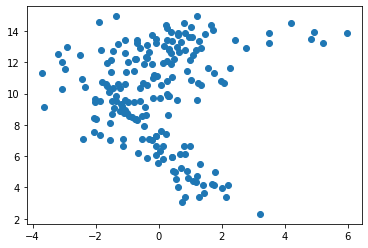

In [252]:
plt.scatter(y= y_pred, x= residuals)

In [211]:
auto_correlation(residuals)

2.05115535118155

# HOMOSCEDASTICITY


# breuschpagan TEST

In [212]:
homoscedasticity_breuschpagan(residuals,xc)

We accept the alter hypothesis : The errors are heteroscedasticity


(4.145926917246869, 0.017275667247557556)

# goldfeldquandt TEST

In [213]:
homoscedasticity_goldfeldquandt(residuals,xc)

We accept the null hypothesis : The errors are homoscedasticity


(0.8596009870443102, 0.767639590232266, 'increasing')

# ERRORS MUST FOLLOW NORMAL DISTRIBUTION

H0 : THE ERRORS ARE NORMALLY DISTRIBUTED
    
H1 : THE ERRORS ARE NOT NORMALLY DISTRIBUTED

The statistic value is 0.9661393761634827 with p-value : 0.00012608447286766022
None is not normally distributed
Outlier : [4.216932025334863, 4.921875619645146, 5.96882455580219, 5.230430373632387, 4.837043152861803]


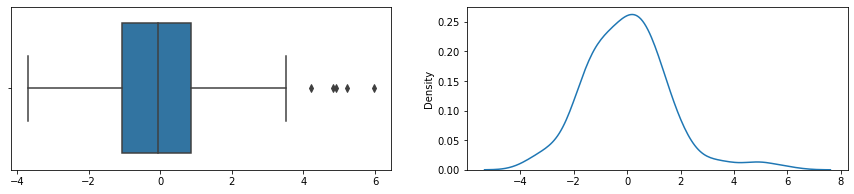

In [214]:
feature_box_kde_normality_errors(residuals)

<AxesSubplot:ylabel='Density'>

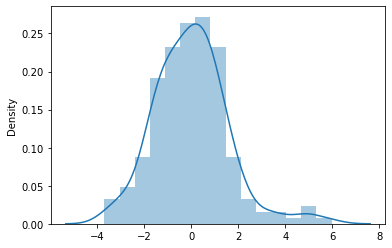

In [215]:
sns.distplot(residuals)

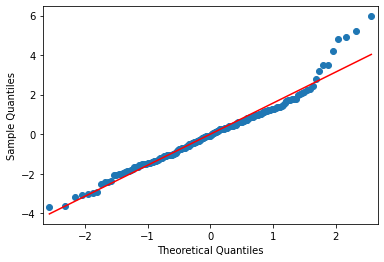

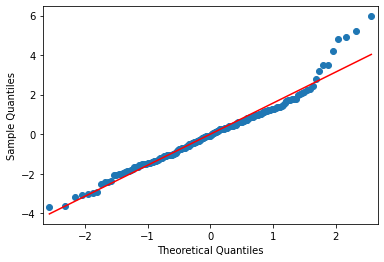

In [216]:
from statsmodels.api import qqplot
qqplot(residuals, line='r')

In [217]:
from statsmodels.stats.api import jarque_bera

In [218]:
jarque_bera(residuals)

(35.99527851311282,
 1.5265976292129873e-08,
 0.6733888779473772,
 4.624565733412838)

# RMSE

In [219]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [220]:
RMSE= np.sqrt(mse(y,y_pred))

In [221]:
RMSE


1.5662497814557474

# TESTING PHASE

In [222]:
xc

,const,weight,year
76,1.0,2933,1972
367,1.0,2605,1982
331,1.0,2145,1980
394,1.0,2130,1982
71,1.0,2330,1972
...,...,...,...
300,1.0,3420,1979
227,1.0,3630,1977
74,1.0,4294,1972
390,1.0,2665,1982


In [223]:
y

76      7.652587
367    11.904024
331    14.369857
394    18.706323
71      8.077730
         ...    
300    10.160935
227     8.077730
74      5.526868
390    13.604599
100     7.652587
Name: Kilometer_per_liter, Length: 194, dtype: float64

In [242]:
x

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name
76,2,4,121.0,112.0,2933,14.5,1972,volvo 145e (sw)
367,1,4,112.0,88.0,2605,19.6,1982,chevrolet cavalier
331,3,4,97.0,67.0,2145,18.0,1980,subaru dl
394,2,4,97.0,52.0,2130,24.6,1982,vw pickup
71,3,3,70.0,97.0,2330,13.5,1972,mazda rx2 coupe
...,...,...,...,...,...,...,...,...
300,1,8,260.0,90.0,3420,22.2,1979,oldsmobile cutlass salon brougham
227,1,6,225.0,100.0,3630,17.7,1977,plymouth volare custom
74,1,8,302.0,140.0,4294,16.0,1972,ford gran torino (sw)
390,3,4,144.0,96.0,2665,13.9,1982,toyota celica gt


In [257]:
y1_pred = model.predict(xc)
y1_pred

76      8.760240
367    13.176141
331    13.746106
394    14.489391
71     10.427376
         ...    
300     9.870161
227     8.587753
74      4.997434
390    13.010257
100     8.867850
Length: 194, dtype: float64

# RMSE

In [246]:
x_test

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name
146,1,4,90.0,75.0,2125,14.5,1974,dodge colt
323,1,4,156.0,105.0,2800,14.4,1980,dodge colt
77,2,4,121.0,76.0,2511,18.0,1972,volkswagen 411 (sw)
249,1,8,260.0,110.0,3365,15.5,1978,oldsmobile cutlass salon brougham
385,3,4,91.0,67.0,1995,16.2,1982,datsun 310 gx
...,...,...,...,...,...,...,...,...
17,1,6,200.0,85.0,2587,16.0,1970,ford maverick
90,1,8,429.0,198.0,4952,11.5,1973,mercury marquis brougham
358,3,4,120.0,74.0,2635,18.3,1981,mazda 626
163,1,6,225.0,95.0,3785,19.0,1975,plymouth fury


In [247]:
y_test

146    11.904024
323    11.861509
77      9.353162
249     8.460360
385    16.155461
         ...    
17      8.928018
90      5.101724
358    13.434541
163     7.652587
58     10.628593
Name: Kilometer_per_liter, Length: 84, dtype: float64